<a href="https://colab.research.google.com/github/therahulparmar/CNN-Model/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#VGG16 Model Architecture from scratch

#### Here I have used Dog vs Cat dataset taken from Kaggle. I have only selected few images from the dataset and divided them into train and test.

# importing libraries

In [24]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout
from keras import backend as K
import keras
from keras.models import Sequential, Model
from keras.models import load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import MaxPool2D
from google.colab.patches import cv2_imshow

# defining train and test path from drive

In [25]:
train_path="/content/drive/MyDrive/Pet/Train"
test_path="/content/drive/MyDrive/Pet/Test"
class_names=os.listdir(train_path)
class_names_test=os.listdir(test_path)

In [26]:
print(class_names)
print(class_names_test)

['train cat', 'train dog']
['test dog', 'test cat']


# Reading sample images

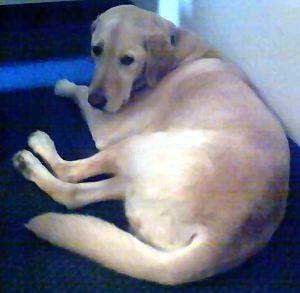

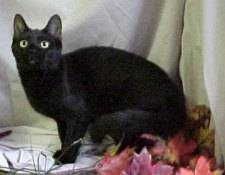

In [27]:
image_dog=cv2.imread("/content/drive/MyDrive/Pet/Test/test dog/dog.70.jpg")
cv2_imshow(image_dog)
image_cat=cv2.imread("/content/drive/MyDrive/Pet/Test/test cat/cat.99.jpg")
cv2_imshow(image_cat)

In [28]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()

In [29]:
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/Pet/Train",target_size=(224, 224),batch_size=32,shuffle=True,class_mode='binary')
test_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/Pet/Test",target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')

Found 140 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


# VGG16 Architecture

In [30]:
def VGG16():
    model = Sequential()
    model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
    model.add(Flatten(name='flatten'))
    model.add(Dense(256, activation='relu', name='fc1'))
    model.add(Dense(128, activation='relu', name='fc2'))
    model.add(Dense(1, activation='sigmoid', name='output'))
    return model

In [31]:
model=VGG16()

# VGG16 model summary

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 56, 56, 256)      

In [33]:
Vgg16 = Model(inputs=model.input, outputs=model.get_layer('vgg16').output)

In [34]:
Vgg16.load_weights("/content/drive/MyDrive/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5")

In [35]:
for layer in Vgg16.layers:
    layer.trainable = False

In [36]:
for layer in model.layers:
    print(layer, layer.trainable)

<keras.layers.convolutional.Conv2D object at 0x7fc0c0bf20d0> False
<keras.layers.convolutional.Conv2D object at 0x7fc0c10f4310> False
<keras.layers.pooling.MaxPooling2D object at 0x7fc0c11cb210> False
<keras.layers.convolutional.Conv2D object at 0x7fc0c20ec150> False
<keras.layers.convolutional.Conv2D object at 0x7fc0c0f57d50> False
<keras.layers.pooling.MaxPooling2D object at 0x7fc0c1114250> False
<keras.layers.convolutional.Conv2D object at 0x7fc0c6abb250> False
<keras.layers.convolutional.Conv2D object at 0x7fc0c0bf2450> False
<keras.layers.convolutional.Conv2D object at 0x7fc0c10eb750> False
<keras.layers.pooling.MaxPooling2D object at 0x7fc0c15d5cd0> False
<keras.layers.convolutional.Conv2D object at 0x7fc0c0ee23d0> False
<keras.layers.convolutional.Conv2D object at 0x7fc0c1301750> False
<keras.layers.convolutional.Conv2D object at 0x7fc0c0ed3490> False
<keras.layers.pooling.MaxPooling2D object at 0x7fc0c0f835d0> False
<keras.layers.convolutional.Conv2D object at 0x7fc0c1111a50> F

# Optimizer and loss function

In [37]:
opt = SGD(lr=1e-4, momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


# Early stopping

In [38]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)

In [39]:
mc = ModelCheckpoint('/content/drive/MyDrive/best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

# Training the model

In [40]:
H = model.fit_generator(train_generator,validation_data=test_generator,epochs=100,verbose=1,callbacks=[mc,es])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
5/5 [==============================] - 103s 21s/step - loss: 3.4068 - accuracy: 0.6126 - val_loss: 2.5839 - val_accuracy: 0.6000
Epoch 2/100
5/5 [==============================] - 101s 24s/step - loss: 1.2873 - accuracy: 0.8227 - val_loss: 1.7795 - val_accuracy: 0.7333
Epoch 3/100
5/5 [==============================] - 100s 21s/step - loss: 0.8700 - accuracy: 0.8217 - val_loss: 0.5631 - val_accuracy: 0.9333
Epoch 4/100
5/5 [==============================] - 100s 21s/step - loss: 0.4911 - accuracy: 0.8893 - val_loss: 0.7102 - val_accuracy: 0.9167
Epoch 5/100
5/5 [==============================] - 100s 23s/step - loss: 0.2214 - accuracy: 0.9530 - val_loss: 1.0770 - val_accuracy: 0.9000
Epoch 6/100
5/5 [==============================] - 101s 21s/step - loss: 0.3768 - accuracy: 0.9577 - val_loss: 0.9043 - val_accuracy: 0.9167
Epoch 7/100
5/5 [==============================] - 101s 24s/step - loss: 0.0959 - accuracy: 0.9860 - val_loss: 0.9398 - val_accuracy: 0.9167
Epoch 8/100
5

In [41]:
model.load_weights("/content/drive/MyDrive/best_model.h5")

# Evaluation on test dataset

In [42]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.5631006956100464, 0.9333333373069763]

# Saving model in a JSON file

In [45]:
  from keras.models import model_from_json
  model_json = model.to_json()
  with open("modelvgg.json", "w") as file:
    file.write(model_json)

In [47]:
from keras.models import model_from_json

def predict_(image_path):
    #Load the Model from Json File
    json_file = open('/content/modelvgg.json', 'r')
    model_json_c = json_file.read()
    json_file.close()
    model_c = model_from_json(model_json_c)
    #Load the weights
    model_c.load_weights("/content/drive/MyDrive/best_model.h5")
    #Compile the model
    opt = SGD(lr=1e-4, momentum=0.9)
    model_c.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
    #load the image you want to classify
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224,224))
    cv2_imshow(image)
    #predict the image
    preds = model_c.predict(np.expand_dims(image, axis=0))[0]
    if preds<=0.5:
        print("Predicted Label: Cat")
    else:
        print("Predicted Label: Dog")

# Performin classification 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


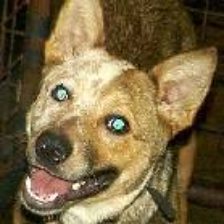

Predicted Label: Dog


In [52]:
predict_("/content/drive/MyDrive/Pet/Test/test dog/dog.86.jpg")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


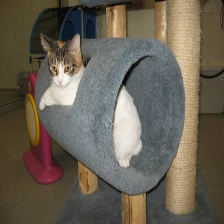

Predicted Label: Cat


In [53]:
predict_("/content/drive/MyDrive/Pet/Test/test cat/cat.90.jpg")